# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import svm, preprocessing, neighbors, datasets, model_selection, metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('busiest_airline_delays.csv')

# Preprocessing

In [3]:
data.head()

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  \
0      1            3          0               5        MORNING   
1      1            3          0               3        MORNING   
2      1            3          0               9        MORNING   
3      1            3          0               1  EARLY_MORNING   
4      1            3          0               2        MORNING   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0               1                 229              142   
1               1                 229              120   
2               1                 229              142   
3               1                   4              128   
4               1                 229               50   

             CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE  \
0   United Air Lines Inc.                  32102  ...         19   
1   United Air Lines Inc.                  32102  ...         22   
2   United Air Lines Inc.                  32102  ...         24   
3  American Airlines Inc.                  32102  ...         20   
4   SkyWest Airlines Inc.                  32102  ...         21   

   DEPARTING_AIRPORT  LATITUDE  LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  \
0  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
1  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
2  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
3  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
4  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   

   TMAX  AWND  
0  72.0  4.47  
1  72.0  4.47  
2  72.0  4.47  
3  72.0  4.47  
4  72.0  4.47  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120894 entries, 0 to 120893
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          120894 non-null  int64  
 1   DAY_OF_WEEK                    120894 non-null  int64  
 2   DEP_DEL15                      120894 non-null  int64  
 3   DISTANCE_GROUP                 120894 non-null  int64  
 4   DEP_BLOCK                      120894 non-null  object 
 5   SEGMENT_NUMBER                 120894 non-null  int64  
 6   CONCURRENT_FLIGHTS             120894 non-null  int64  
 7   NUMBER_OF_SEATS                120894 non-null  int64  
 8   CARRIER_NAME                   120894 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          120894 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          120894 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  120894 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [5]:
data.describe()

MONTH    DAY_OF_WEEK      DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
count  120894.0  120894.000000  120894.000000   120894.000000   120894.000000   
mean        1.0       3.942677       0.149710        3.353525        3.211152   
std         0.0       1.910102       0.356788        1.855241        1.718627   
min         1.0       1.000000       0.000000        1.000000        1.000000   
25%         1.0       2.000000       0.000000        2.000000        2.000000   
50%         1.0       4.000000       0.000000        3.000000        3.000000   
75%         1.0       5.000000       0.000000        4.000000        4.000000   
max         1.0       7.000000       1.000000       11.000000       11.000000   

       CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
count       120894.000000    120894.000000          120894.000000   
mean           177.968783       127.222674           24984.998114   
std             52.524855        50.946997            4667.824038   
min              1.000000        44.000000           19902.000000   
25%            156.000000        76.000000           20193.000000   
50%            182.000000       142.000000           23873.000000   
75%            213.000000       172.000000           32102.000000   
max            286.000000       337.000000           32102.000000   

       AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
count          120894.000000                  120894.000000  ...   
mean            58978.630974                    7537.814565  ...   
std             27722.923436                    6050.361247  ...   
min              7688.000000                       1.000000  ...   
25%             25366.000000                    3787.000000  ...   
50%             69699.000000                    5347.000000  ...   
75%             80026.000000                   11786.000000  ...   
max            107849.000000                   19461.000000  ...   

       FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS      PLANE_AGE  \
count            120894.000000         120894.000000  120894.000000   
mean                  0.000612              0.000723      11.730557   
std                   0.000532              0.000263       7.522912   
min                   0.000000              0.000033       0.000000   
25%                   0.000170              0.000492       4.000000   
50%                   0.000504              0.000792      13.000000   
75%                   0.000768              0.000911      18.000000   
max                   0.001759              0.001265      32.000000   

            LATITUDE      LONGITUDE           PRCP           SNOW  \
count  120894.000000  120894.000000  120894.000000  120894.000000   
mean       36.489558     -90.471664       0.126495       0.042920   
std         3.600088       8.318211       0.307733       0.262952   
min        32.894000    -104.880000       0.000000       0.000000   
25%        33.641000     -97.030000       0.000000       0.000000   
50%        35.219000     -87.906000       0.000000       0.000000   
75%        39.774000     -84.427000       0.020000       0.000000   
max        41.978000     -80.936000       1.910000       3.100000   

                SNWD           TMAX           AWND  
count  120894.000000  120894.000000  120894.000000  
mean        0.144341      51.493838       8.819766  
std         0.486133      11.645643       3.449294  
min         0.000000      19.000000       2.680000  
25%         0.000000      42.000000       6.040000  
50%         0.000000      53.000000       8.050000  
75%         0.000000      60.000000      11.180000  
max         2.000000      79.000000      25.050000  

[8 rows x 22 columns]

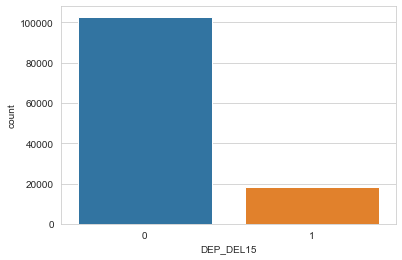

In [6]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [7]:
data = data.drop_duplicates()
data = data.drop(columns=['MONTH','LATITUDE','LONGITUDE'])
data = data.drop(columns=['CONCURRENT_FLIGHTS','AIRPORT_FLIGHTS_MONTH','AIRLINE_FLIGHTS_MONTH'])
data.head()

DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  SEGMENT_NUMBER  \
0            3          0               5        MORNING               1   
1            3          0               3        MORNING               1   
2            3          0               9        MORNING               1   
3            3          0               1  EARLY_MORNING               1   
4            3          0               2        MORNING               1   

   NUMBER_OF_SEATS            CARRIER_NAME  AIRLINE_AIRPORT_FLIGHTS_MONTH  \
0              142   United Air Lines Inc.                            361   
1              120   United Air Lines Inc.                            361   
2              142   United Air Lines Inc.                            361   
3              128  American Airlines Inc.                            892   
4               50   SkyWest Airlines Inc.                           2048   

   AVG_MONTHLY_PASS_AIRPORT  AVG_MONTHLY_PASS_AIRLINE  \
0                    816174                   1539321   
1                    816174                   1539321   
2                    816174                   1539321   
3                    816174                   2286836   
4                    816174                    698248   

   FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS  PLANE_AGE  \
0                 0.001402              0.001265         19   
1                 0.001402              0.001265         22   
2                 0.001402              0.001265         24   
3                 0.000504              0.000911         20   
4                 0.000170              0.000492         21   

   DEPARTING_AIRPORT PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  AWND  
0  Atlanta Municipal             NONE   0.0   0.0   0.0  72.0  4.47  
1  Atlanta Municipal             NONE   0.0   0.0   0.0  72.0  4.47  
2  Atlanta Municipal             NONE   0.0   0.0   0.0  72.0  4.47  
3  Atlanta Municipal             NONE   0.0   0.0   0.0  72.0  4.47  
4  Atlanta Municipal             NONE   0.0   0.0   0.0  72.0  4.47

# Neural network

In [8]:
# Encode labels in columns
label_encoder = preprocessing.LabelEncoder()
data['DEP_BLOCK']= label_encoder.fit_transform(data['DEP_BLOCK'])
data['CARRIER_NAME']= label_encoder.fit_transform(data['CARRIER_NAME'])
data['DEPARTING_AIRPORT']= label_encoder.fit_transform(data['DEPARTING_AIRPORT'])
data['PREVIOUS_AIRPORT']= label_encoder.fit_transform(data['PREVIOUS_AIRPORT'])

## Split Data

In [9]:
# data_feat yang khusus hanya akan berisi nilai-nilai atribut/fitur/variabel saja.
# data_target yang khusus hanya akan berisi label/kelas/target 
df_feat = data.drop('DEP_DEL15',axis=1) 
df_feat.head()

DAY_OF_WEEK  DISTANCE_GROUP  DEP_BLOCK  SEGMENT_NUMBER  NUMBER_OF_SEATS  \
0            3               5          5               1              142   
1            3               3          5               1              120   
2            3               9          5               1              142   
3            3               1          1               1              128   
4            3               2          5               1               50   

   CARRIER_NAME  AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
0            15                            361                    816174   
1            15                            361                    816174   
2            15                            361                    816174   
3             2                            892                    816174   
4            12                           2048                    816174   

   AVG_MONTHLY_PASS_AIRLINE  FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS  \
0                   1539321                 0.001402              0.001265   
1                   1539321                 0.001402              0.001265   
2                   1539321                 0.001402              0.001265   
3                   2286836                 0.000504              0.000911   
4                    698248                 0.000170              0.000492   

   PLANE_AGE  DEPARTING_AIRPORT  PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  \
0         19                  0               178   0.0   0.0   0.0  72.0   
1         22                  0               178   0.0   0.0   0.0  72.0   
2         24                  0               178   0.0   0.0   0.0  72.0   
3         20                  0               178   0.0   0.0   0.0  72.0   
4         21                  0               178   0.0   0.0   0.0  72.0   

   AWND  
0  4.47  
1  4.47  
2  4.47  
3  4.47  
4  4.47

In [10]:
# df_target yang khusus hanya akan berisi label/kelas/target, yaitu apakah positif kanker ganas atau tidak
df_target = data['DEP_DEL15'] 
df_target.head()

0    0
1    0
2    0
3    0
4    0
Name: DEP_DEL15, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target, test_size=0.30, random_state=0)
print("Jumlah Training Data : ", len(X_train), " | Jumlah Test Data : ", len(X_test))

Jumlah Training Data :  83811  | Jumlah Test Data :  35920


In [12]:
oversample = imblearn.over_sampling.SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts()

0    71137
1    71137
Name: DEP_DEL15, dtype: int64

## Transformasi data

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.66666667, 0.4       , 0.        , ..., 0.        , 0.6       ,
        0.56012517],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.53333333,
        0.14036656],
       [0.5       , 0.3       , 0.6       , ..., 0.        , 0.51666667,
        0.18015199],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.61666667,
        0.33035315],
       [0.66666667, 0.        , 0.4       , ..., 0.        , 0.6       ,
        0.13008494],
       [0.16666667, 0.1       , 0.        , ..., 0.        , 0.36666667,
        0.32007152]])

In [21]:
layer_size = [8, 20]
activation_function = "tanh"

clf = MLPClassifier(hidden_layer_sizes = layer_size, random_state = 0, activation = activation_function, solver = "lbfgs")
clf.fit(X_train_scaled, y_train)
clf.get_params()

C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [8, 20],
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [22]:
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of NN classifier on training set: 0.72
Accuracy of NN classifier on test set: 0.69


In [23]:
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80     30535
           1       0.23      0.45      0.30      5385

    accuracy                           0.69     35920
   macro avg       0.56      0.59      0.55     35920
weighted avg       0.79      0.69      0.73     35920

